<a href="https://colab.research.google.com/github/Arooj-Fatima14/Robotics_World-internship-/blob/main/Animal_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Animal classification using CNN

In [1]:
!import kaggle


/bin/bash: line 1: import: command not found


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/internship/kaggle.json ~/.kaggle/kaggle.json

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download borhanitrash/animal-image-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/borhanitrash/animal-image-classification-dataset
License(s): MIT
 34% 13.0M/38.4M [00:00<00:00, 135MB/s]
100% 38.4M/38.4M [00:00<00:00, 207MB/s]


In [7]:
!unzip animal-image-classification-dataset.zip

Archive:  animal-image-classification-dataset.zip
  inflating: Animals/cats/0_0001.jpg  
  inflating: Animals/cats/0_0002.jpg  
  inflating: Animals/cats/0_0003.jpg  
  inflating: Animals/cats/0_0004.jpg  
  inflating: Animals/cats/0_0005.jpg  
  inflating: Animals/cats/0_0006.jpg  
  inflating: Animals/cats/0_0007.jpg  
  inflating: Animals/cats/0_0008.jpg  
  inflating: Animals/cats/0_0009.jpg  
  inflating: Animals/cats/0_0010.jpg  
  inflating: Animals/cats/0_0011.jpg  
  inflating: Animals/cats/0_0012.jpg  
  inflating: Animals/cats/0_0013.jpg  
  inflating: Animals/cats/0_0014.jpg  
  inflating: Animals/cats/0_0015.jpg  
  inflating: Animals/cats/0_0016.jpg  
  inflating: Animals/cats/0_0017.jpg  
  inflating: Animals/cats/0_0018.jpg  
  inflating: Animals/cats/0_0019.jpg  
  inflating: Animals/cats/0_0020.jpg  
  inflating: Animals/cats/0_0021.jpg  
  inflating: Animals/cats/0_0022.jpg  
  inflating: Animals/cats/0_0023.jpg  
  inflating: Animals/cats/0_0024.jpg  
  inflating: A

In [8]:
!pip install tensorflow

# importing libraries

In [9]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras import layers, models

# Fetching Data

In [10]:
main_folder = '/content/Animals'  # Update this path
subfolders = ['cats', 'dogs', 'snakes']  # Add your folder names here

# Combine to create full paths to each folder
folder_paths = [os.path.join(main_folder, subfolder) for subfolder in subfolders]


In [11]:
image_data = []
labels = []

for idx, folder_path in enumerate(folder_paths):
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = image.load_img(img_path, target_size=(256, 256))  # Resize images if necessary
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(subfolders[idx])  # Store corresponding label


In [12]:
image_data[1][0]

array([[226., 214., 202.],
       [232., 220., 208.],
       [234., 221., 212.],
       [233., 220., 211.],
       [234., 221., 212.],
       [233., 220., 211.],
       [217., 204., 196.],
       [199., 186., 178.],
       [198., 185., 177.],
       [201., 188., 180.],
       [205., 192., 186.],
       [208., 195., 189.],
       [210., 197., 191.],
       [209., 196., 190.],
       [208., 195., 189.],
       [207., 192., 187.],
       [209., 191., 189.],
       [210., 192., 190.],
       [212., 194., 190.],
       [211., 198., 190.],
       [212., 199., 191.],
       [208., 200., 189.],
       [208., 200., 187.],
       [206., 200., 186.],
       [183., 177., 163.],
       [147., 141., 127.],
       [104.,  98.,  86.],
       [ 89.,  83.,  71.],
       [ 98.,  87.,  81.],
       [116., 105.,  99.],
       [169., 158., 154.],
       [233., 222., 218.],
       [246., 236., 234.],
       [245., 235., 233.],
       [243., 233., 231.],
       [243., 233., 231.],
       [243., 235., 233.],
 

In [13]:
cat = image_data[0]
dog = image_data[1200]
snake = image_data[2300]

# plotting smaple images

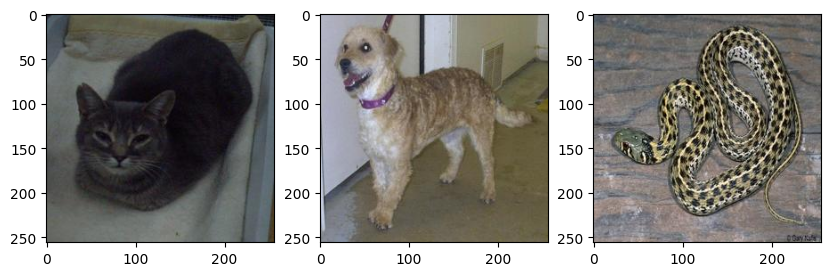

In [14]:
figure = plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(cat.astype('uint8'))
plt.subplot(1, 3, 2)
plt.imshow(dog.astype('uint8'))
plt.subplot(1, 3, 3)
plt.imshow(snake.astype('uint8'))
plt.show()


# Splitting Data into train and test

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    image_data,  # Features (images)
    labels,
    test_size=0.2,
    shuffle=True)


In [16]:
X_trainn= np.array(X_train)
X_testn = np.array(X_test)
y_trainn = np.array(y_train)
y_testn = np.array(y_test)


In [17]:
X_trainn.shape, X_testn.shape, y_trainn.shape, y_testn.shape

((2400, 256, 256, 3), (600, 256, 256, 3), (2400,), (600,))

In [18]:
y_trainn [:]

array(['dogs', 'cats', 'cats', ..., 'cats', 'dogs', 'snakes'], dtype='<U6')

In [19]:
y_testn[:]

array(['snakes', 'dogs', 'snakes', 'cats', 'cats', 'cats', 'cats', 'cats',
       'snakes', 'snakes', 'cats', 'snakes', 'snakes', 'dogs', 'cats',
       'dogs', 'dogs', 'dogs', 'cats', 'snakes', 'dogs', 'dogs', 'cats',
       'snakes', 'snakes', 'snakes', 'dogs', 'dogs', 'dogs', 'cats',
       'cats', 'cats', 'dogs', 'dogs', 'snakes', 'snakes', 'snakes',
       'snakes', 'snakes', 'dogs', 'cats', 'cats', 'dogs', 'cats', 'cats',
       'dogs', 'cats', 'snakes', 'dogs', 'cats', 'dogs', 'dogs', 'dogs',
       'snakes', 'snakes', 'snakes', 'dogs', 'cats', 'dogs', 'dogs',
       'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'dogs', 'snakes', 'snakes',
       'cats', 'cats', 'cats', 'snakes', 'cats', 'cats', 'dogs', 'cats',
       'dogs', 'snakes', 'dogs', 'cats', 'dogs', 'snakes', 'snakes',
       'dogs', 'cats', 'cats', 'cats', 'snakes', 'snakes', 'cats',
       'snakes', 'dogs', 'cats', 'snakes', 'cats', 'snakes', 'cats',
       'snakes', 'cats', 'snakes', 'cats', 'snakes', 'dogs', 'snakes',
  

In [20]:
def plot_sample(X, y, index):
    plt.figure(figsize=(8, 4))
    img= X[index]
    lbl= y[index]
    plt.imshow(img.astype('uint8'))
    plt.title(f"Label: {lbl}")
    plt.show()


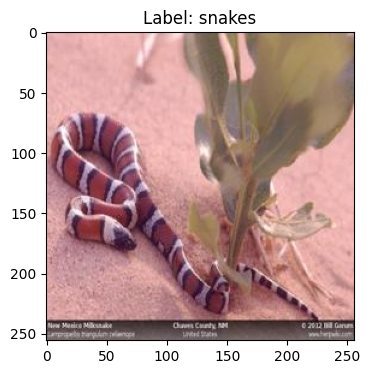

In [46]:
plot_sample(X_train, y_train, 7)

In [23]:
X_trainn = X_trainn / 255.0
X_testn = X_testn / 255.0

# Creating CNN and training

In [18]:

import numpy as np

# Assuming y_trainn contains your labels
label_map = {'cats': 0, 'dogs': 1, 'snakes': 2}
y_trainn = np.array([label_map[label] for label in y_trainn])

In [41]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [42]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(X_trainn, y_trainn , epochs=5 )

Epoch 1/5
75/75 [==============================] - 35s 462ms/step - loss: 1.5993 - accuracy: 0.5204
Epoch 2/5
75/75 [==============================] - 34s 459ms/step - loss: 0.6397 - accuracy: 0.7138
Epoch 3/5
75/75 [==============================] - 35s 465ms/step - loss: 0.4271 - accuracy: 0.8304
Epoch 4/5
75/75 [==============================] - 35s 460ms/step - loss: 0.2503 - accuracy: 0.9079
Epoch 5/5
75/75 [==============================] - 35s 469ms/step - loss: 0.1237 - accuracy: 0.9658


In [45]:
from tensorflow.keras import layers, models, regularizers

cnn = models.Sequential([
    # First convolutional layer with reduced L2 regularization
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.0005), input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer with reduced L2 regularization
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.0005)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    # Dense layer with reduced L2 regularization and less Dropout
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    layers.Dropout(0.3),  # Reduced Dropout rate to 30%

    # Output layer
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn.fit(X_trainn, y_trainn, epochs=10)


Epoch 1/10
75/75 [==============================] - 36s 471ms/step - loss: 2.3616 - accuracy: 0.4913
Epoch 2/10
75/75 [==============================] - 35s 471ms/step - loss: 0.8937 - accuracy: 0.6429
Epoch 3/10
75/75 [==============================] - 36s 475ms/step - loss: 0.7970 - accuracy: 0.7079
Epoch 4/10
75/75 [==============================] - 36s 477ms/step - loss: 0.7437 - accuracy: 0.7412
Epoch 5/10
75/75 [==============================] - 36s 474ms/step - loss: 0.6566 - accuracy: 0.8058
Epoch 6/10
75/75 [==============================] - 36s 476ms/step - loss: 0.5630 - accuracy: 0.8617
Epoch 7/10
75/75 [==============================] - 36s 479ms/step - loss: 0.5075 - accuracy: 0.8988
Epoch 8/10
75/75 [==============================] - 36s 477ms/step - loss: 0.4600 - accuracy: 0.9221
Epoch 9/10
75/75 [==============================] - 36s 481ms/step - loss: 0.4232 - accuracy: 0.9379
Epoch 10/10
75/75 [==============================] - 36s 483ms/step - loss: 0.4021 - accura

In [36]:
y_trainn[:56]

array([1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 2, 2, 0, 2, 1,
       2, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0])

In [47]:

import numpy as np

# Assuming y_trainn contains your labels
label_map = {'cats': 0, 'dogs': 1, 'snakes': 2}
y_testn = np.array([label_map[label] for label in y_testn])

# Evaluating CNN

In [47]:
import tensorflow as tf
import numpy as np
from keras import layers, models

# # Get unique labels from both y_trainn and y_testn
# labels = np.unique(np.concatenate((y_trainn, y_testn)))

# # Create a mapping from labels to numerical values
# label_to_index = {label: index for index, label in enumerate(labels)}

# # Convert labels in y_testn to numerical values
# y_testn_indexed = np.array([label_to_index[label] for label in y_testn])

# Now you can evaluate your model
cnn.evaluate(X_testn, y_testn)

19/19 [==============================] - 2s 95ms/step - loss: 1.0625 - accuracy: 0.7200


[1.0624996423721313, 0.7200000286102295]

In [48]:
y_pred = cnn.predict(X_testn)
y_pred[:]


19/19 [==============================] - 2s 90ms/step


array([[1.11150570e-04, 4.65295557e-03, 9.94926870e-01, ...,
        4.65144421e-06, 1.29731916e-05, 1.06477346e-04],
       [8.49051595e-01, 1.33035213e-01, 1.43142724e-02, ...,
        1.20919186e-03, 6.86768268e-04, 3.72490525e-04],
       [3.44037835e-04, 5.21181198e-03, 9.93930817e-01, ...,
        3.44029613e-05, 4.70419491e-06, 1.83729077e-04],
       ...,
       [3.92918475e-03, 9.95583236e-01, 4.10227716e-04, ...,
        2.50690891e-06, 6.72845272e-05, 4.93583627e-07],
       [9.00323596e-03, 9.72627731e-07, 9.90993381e-01, ...,
        1.14976183e-06, 2.83573183e-08, 3.46198163e-08],
       [6.30462717e-04, 3.13752443e-02, 9.66389716e-01, ...,
        9.06473870e-05, 1.29735476e-04, 3.40465456e-04]], dtype=float32)

In [49]:
y_pred_classes =[np.argmax(element) for element in y_pred]
y_pred[:]

array([[1.11150570e-04, 4.65295557e-03, 9.94926870e-01, ...,
        4.65144421e-06, 1.29731916e-05, 1.06477346e-04],
       [8.49051595e-01, 1.33035213e-01, 1.43142724e-02, ...,
        1.20919186e-03, 6.86768268e-04, 3.72490525e-04],
       [3.44037835e-04, 5.21181198e-03, 9.93930817e-01, ...,
        3.44029613e-05, 4.70419491e-06, 1.83729077e-04],
       ...,
       [3.92918475e-03, 9.95583236e-01, 4.10227716e-04, ...,
        2.50690891e-06, 6.72845272e-05, 4.93583627e-07],
       [9.00323596e-03, 9.72627731e-07, 9.90993381e-01, ...,
        1.14976183e-06, 2.83573183e-08, 3.46198163e-08],
       [6.30462717e-04, 3.13752443e-02, 9.66389716e-01, ...,
        9.06473870e-05, 1.29735476e-04, 3.40465456e-04]], dtype=float32)

# Prediction

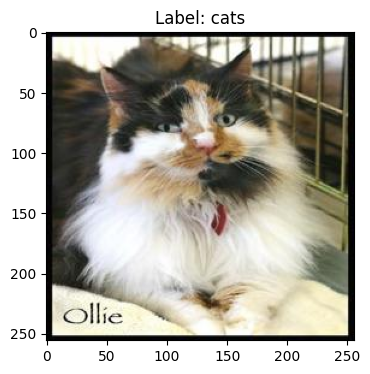

In [57]:
plot_sample(X_test, y_test, 5)

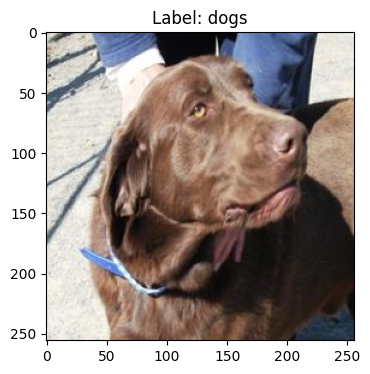

In [70]:
 plot_sample(X_test, y_test, 50)

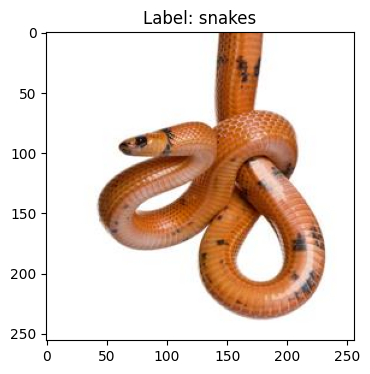

In [71]:
plot_sample(X_test, y_test, 599)

# Creating and Training ANN

In [61]:
ann = models.Sequential([
    layers.Flatten(input_shape=(256, 256, 3)),
    layers.Dense(1000, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(X_trainn, y_trainn, epochs=10)


Epoch 1/10
75/75 [==============================] - 16s 205ms/step - loss: 3.3005 - accuracy: 0.3237
Epoch 2/10
75/75 [==============================] - 16s 207ms/step - loss: 1.1295 - accuracy: 0.3617
Epoch 3/10
75/75 [==============================] - 16s 208ms/step - loss: 1.1105 - accuracy: 0.3879
Epoch 4/10
75/75 [==============================] - 16s 208ms/step - loss: 1.0594 - accuracy: 0.4342
Epoch 5/10
75/75 [==============================] - 16s 209ms/step - loss: 1.0578 - accuracy: 0.4417
Epoch 6/10
75/75 [==============================] - 16s 211ms/step - loss: 1.0581 - accuracy: 0.4692
Epoch 7/10
75/75 [==============================] - 16s 216ms/step - loss: 1.0090 - accuracy: 0.4771
Epoch 8/10
75/75 [==============================] - 16s 215ms/step - loss: 1.0002 - accuracy: 0.4817
Epoch 9/10
75/75 [==============================] - 16s 214ms/step - loss: 0.9725 - accuracy: 0.5121
Epoch 10/10
75/75 [==============================] - 16s 217ms/step - loss: 0.9641 - accura

Evaluating ANN

In [63]:
ann.evaluate(X_testn, y_testn)

19/19 [==============================] - 1s 26ms/step - loss: 0.9844 - accuracy: 0.5367


[0.984403669834137, 0.5366666913032532]

In [64]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_testn)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_testn,y_pred_classes))

19/19 [==============================] - 1s 25ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.80      0.61       205
           1       0.50      0.26      0.34       201
           2       0.65      0.55      0.59       194

    accuracy                           0.54       600
   macro avg       0.55      0.54      0.52       600
weighted avg       0.54      0.54      0.52       600



In [67]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

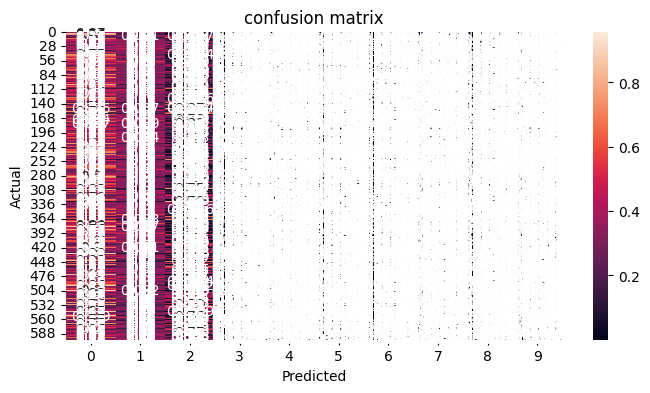

In [69]:
plt.figure(figsize = (8,4))
sns.heatmap(y_pred , annot = True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('confusion matrix')
plt.show

1/1 [==============================] - 0s 60ms/step


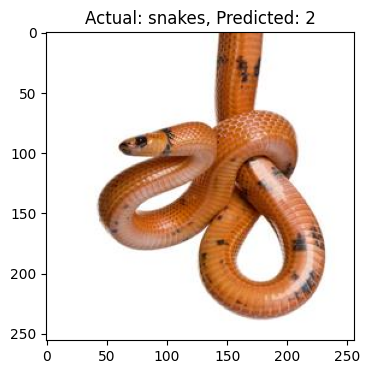

In [73]:
# prompt: take one image from test set by index 78 and predict it and plot it with label both actual and predicted

import matplotlib.pyplot as plt
import numpy as np
# Get the image and its actual label
index = 599
image = X_test[index]
actual_label = y_test[index]

# Predict the image
prediction = cnn.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction)

# Plot the image with labels
plt.figure(figsize=(8, 4))
plt.imshow(image.astype('uint8'))
plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
plt.show()


# Conclusion
CNN outperformed the ANN